# Active Reset Calibration

Code and datasets for producing **Figure 3b-e** from _A quantum-classical cloud platform optimized for variational hybrid algorithms_.

The `active-reset-calibration.csv` file contains optimal quadrature (OQ) readout signal data from three successive rounds of of active qubit reset on qubit 15 of the Aspen-4 QPU, starting from an equal superposition input state. The `capture_x_oq` columns (for `x` from 0 to 3) are the OQ data, and the `capture_x_result` columns are the corresponding readout classification results (0 or 1) for each round. Round 0 is the equal superposition state.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("ticks")

## Load the Data

In [2]:
data = pd.read_csv("datasets/active-reset-calibration.csv")

## Plot the Data

In [3]:
# specify the bins to get the same range for all plots
max_oq = max(data[f"capture_{ct}_oq"].max() for ct in range(4))
min_oq = min(data[f"capture_{ct}_oq"].min() for ct in range(4))
bins = np.linspace(min_oq, max_oq, 50)

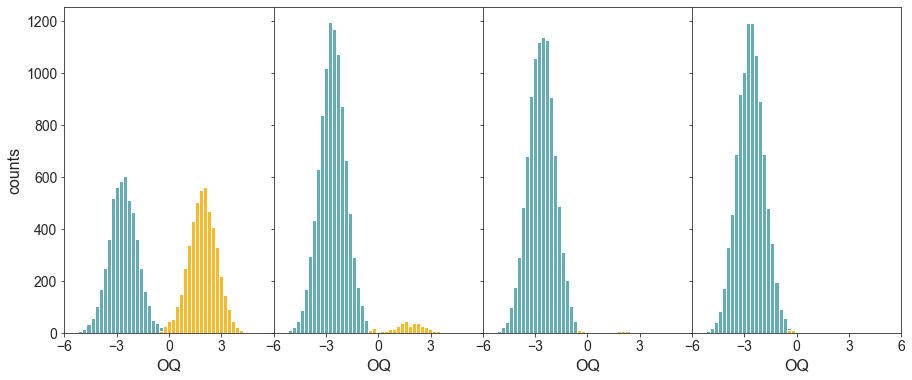

In [4]:
# figure with 1 row of 4 subplots, sharing the y-axis
fig, axes = plt.subplots(1, 4, figsize=(15, 6), sharey=True) 

# set the spacing between subplots to zero
fig.subplots_adjust(wspace=0)

# iterate through rounds
for ct in range(4):

    # filter for the called state at that capture
    called_0 = data[f"capture_{ct}_oq"][data[f"capture_{ct}_result"] == 0]
    called_1 = data[f"capture_{ct}_oq"][data[f"capture_{ct}_result"] == 1]
    
    # plot color-coded histograms for 0-classified and 1-classified results
    axes[ct].hist(called_0, bins=bins, color='#66acb4')  # teal
    axes[ct].hist(called_1, bins=bins, color='#f8ba2b')  # gold

    # add x-axis ticks and labels
    axes[ct].tick_params(axis="both", which="major", labelsize=14)
    axes[ct].set_xlim(-6,6)
    if ct < 3:
        axes[ct].set_xticks([-6,-3,0,3])
    else:
        axes[ct].set_xticks([-6,-3,0,3,6])

    # add x-axis label for each subplot
    axes[ct].set_xlabel("OQ", fontsize=16)

# add y-axis label for just subplot 0
axes[0].set_ylabel("counts", fontsize=16);